You've used the SUM aggregate function with windows to calculate running totals. What if you want to calculate group-level and grand totals?


You want to write a SQL query that returns this table. The Country- and Medal-level totals are easy enough, but the Country-level totals are more difficult to get. Most spreadsheets support group-level totals, so how do you do this in SQL?

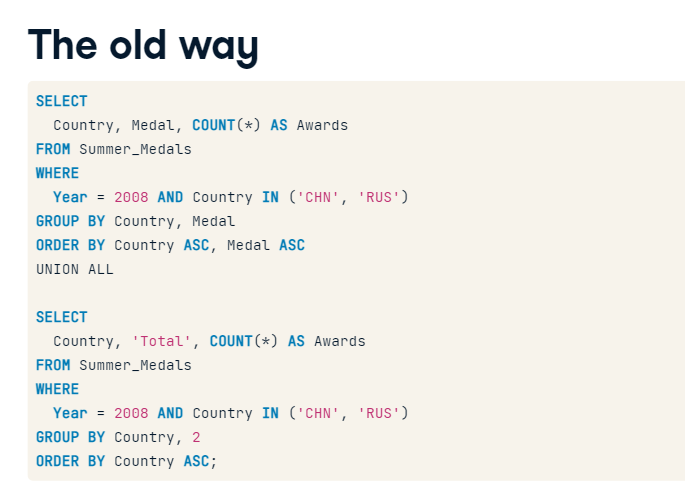


One way is to generate Country- and Medal-level totals with one query, and generate Country-level with another. However, this method is inelegant, and quickly grows infeasible the more columns you have; you'd have to add an additional query for each column whose group-level total you want. There has to be a better way.

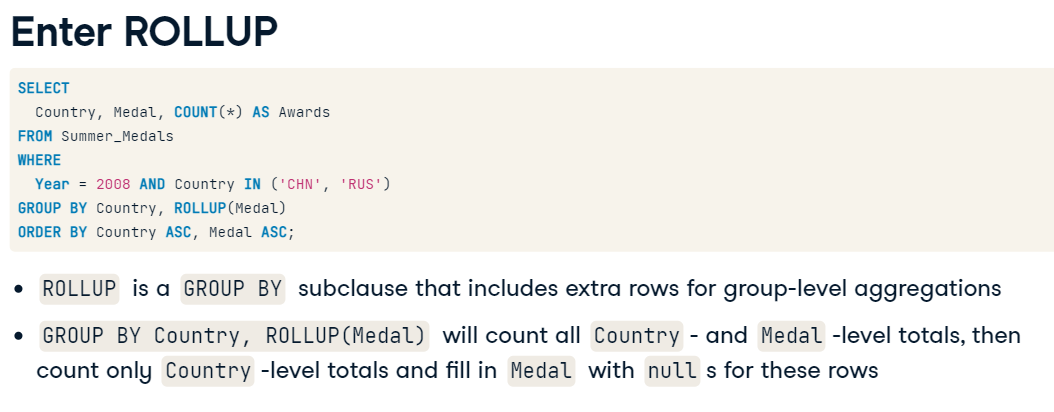

Enter ROLLUP. ROLLUP is a GROUP BY subclause that includes extra rows for group-level aggregations. In this query, grouping by Country and ROLL-ing UP Medal will count all Country- and Medal-level totals, then count only Country-level totals and fill in Medal with nulls for these rows. Using ROLLUP, you can rewrite the previous query in a succinct way.

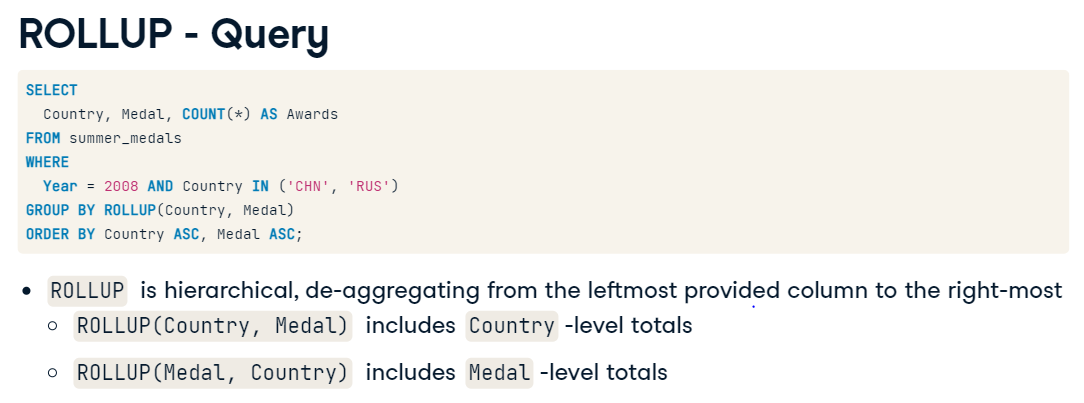

You can also use ROLLUP to generate grand totals. If you ROLLUP all GROUP BY columns, you'll have an additional row with the grand total. ROLLUP is hierarchical; the order of the columns in the ROLLUP clause affects the output. If you ROLLUP Country then Medal, you'll get Country-level totals, but if you reverse the columns, you'll get Medal-level totals. Both will include the grand total, though.

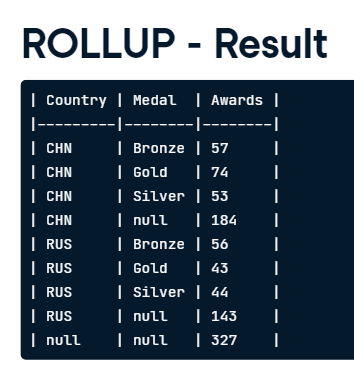

This is the result of the previous query. Look out for the rows that contain nulls. The rows for which Country is filled but Medal is null represent the Country-level totals; for example, 184 medals in total were awarded to China in 2008. The row with nulls in both columns is the grand total. Notice that there are no Medal-level totals, since you're ROLL-ing UP by Country then Medal, and not vice-versa. What if you also wanted Medal-level totals?

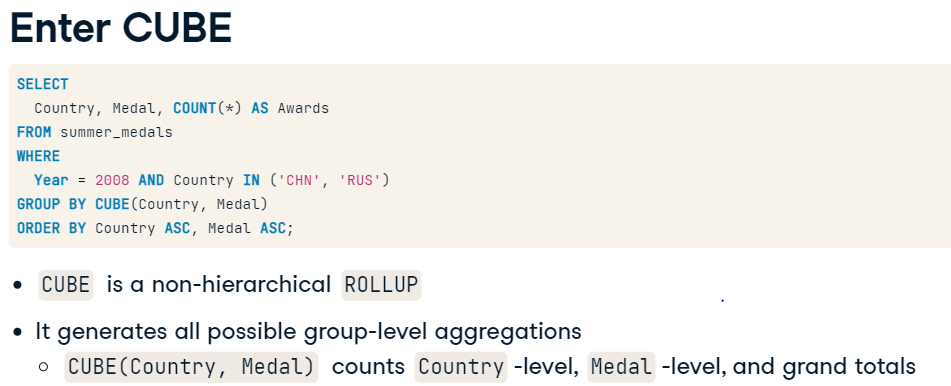

Enter CUBE. CUBE is much like its cousin ROLLUP, except that it's not hierarchical. It generates all possible group-level aggregations. CUBE-ing Country and Medal counts Country-level, Medal-level, and grand totals.

This is the result of the previous query. Notice that Medal-level totals are included as well as Country-level totals. The Medal-level totals are those whose Country is null but whose Medal is not. For example, China and Russia were awarded a total of 117 gold medals in 2008. The grand total is also included.

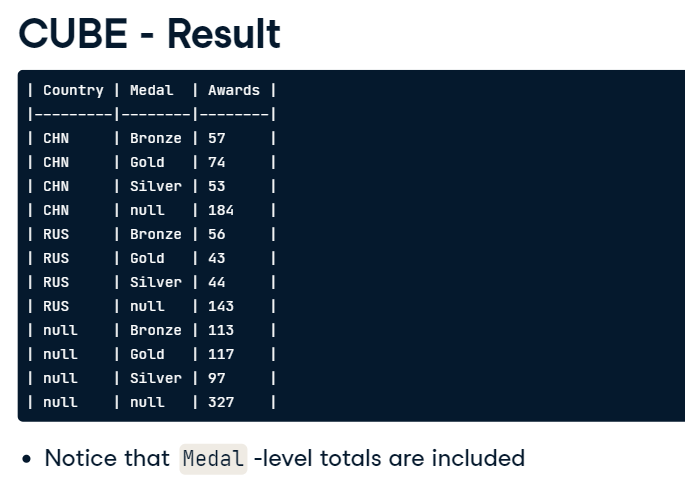

The two subclauses are similar, so when you do use each? Take the following example. The source table represents a company's quarterly sales in the first two quarters of 2008 and 2009. ROLL-ing up Year then Quarter will give you the total sales in the first halfs of each year, as well as the grand total of sales in both years. 

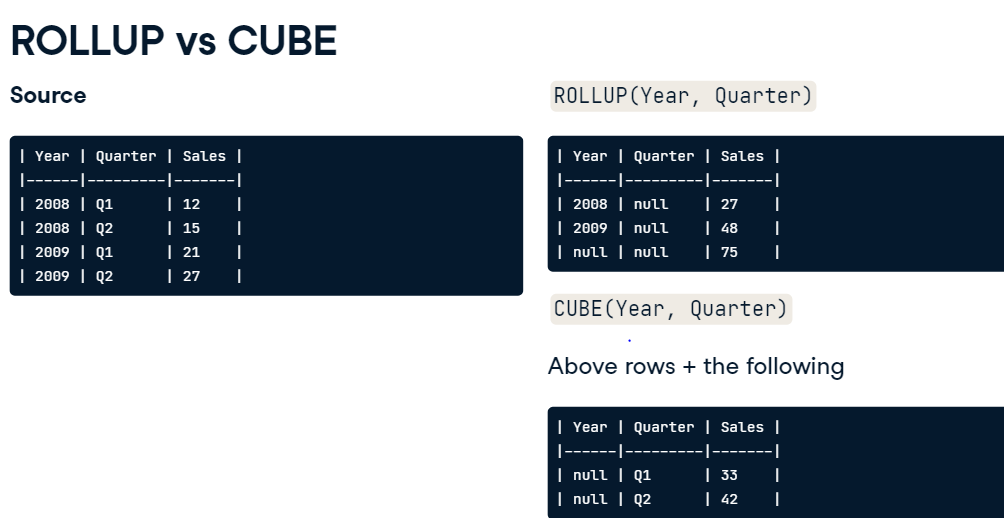

CUBE-ing Year then Quarter will give you all of the above plus the sum of sales in each quarter regardless of year. This doesn't really make sense -- quarterly sales regardless of year don't really represent anything. As such, use ROLLUP when you have hierarchical data in your columns, such as date parts, because in such cases, only some group-level aggregations make sense. Use CUBE when you want all possible group-level aggregations.

With ROLLUP and CUBE, you can succinctly generate many group-level aggregations. Both are generalized by a special GROUPING SETS clause, but for now, let's practice these two subclauses in the following exercises.


#### Country-level subtotals
You want to look at three Scandinavian countries' earned gold medals per country and gender in the year 2000. You're also interested in Country-level subtotals to get the total medals earned for each country, but Gender-level subtotals don't make much sense in this case, so disregard them.

- Count the gold medals awarded per country and gender.
- Generate Country-level gold award counts.

```sql
-- Count the gold medals per country and gender
SELECT
  country,
  gender,
  COUNT(*) AS Gold_Awards
FROM Summer_Medals
WHERE
  Year = 2004
  AND Medal = 'Gold'
  AND Country IN ('DEN', 'NOR', 'SWE')
-- Generate Country-level subtotals
GROUP BY Country, Rollup(Gender)
ORDER BY Country ASC, Gender ASC;
```

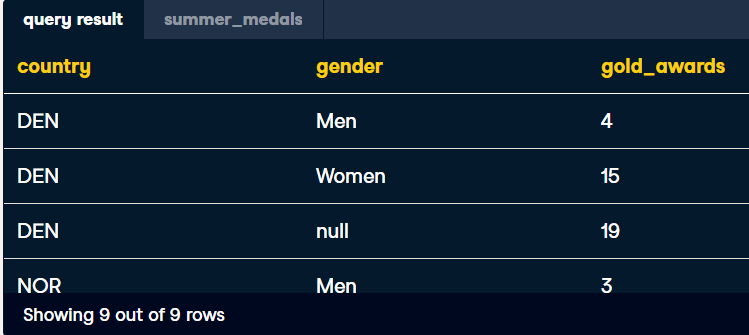


####  All group-level subtotals
You want to break down all medals awarded to Russia in the 2012 Olympic games per gender and medal type. Since the medals all belong to one country, Russia, it makes sense to generate all possible subtotals (Gender- and Medal-level subtotals), as well as a grand total.

Generate a breakdown of the medals awarded to Russia per country and medal type, including all group-level subtotals and a grand total.


- Count the medals awarded per gender and medal type.
- Generate all possible group-level counts (per gender and medal type subtotals and the grand total).

```sql
-- Count the medals per country and medal type
SELECT
  Gender,
  Medal,
  COUNT(*) AS Awards
FROM Summer_Medals
WHERE
  Year = 2012
  AND Country = 'RUS'
-- Get all possible group-level subtotals
GROUP BY CUBE(Gender, Medal)
ORDER BY Gender ASC, Medal ASC;
```

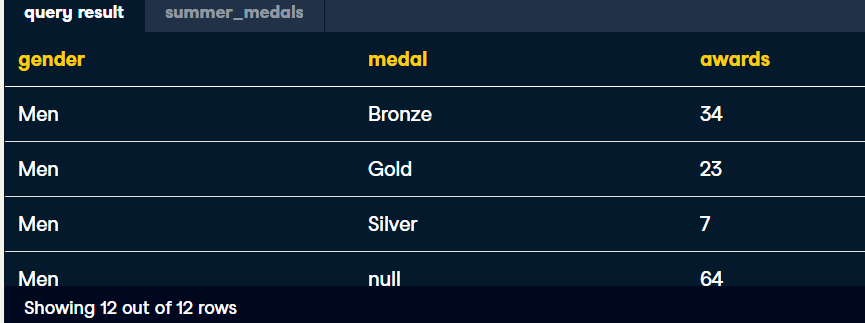



